<a href="https://colab.research.google.com/github/mayurtummewar/crypto-watermarking/blob/main/second_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [2]:
!pip install pywavelets opencv-python

In [3]:
import numpy as np
import pywt
import cv2
import matplotlib.pyplot as plt
from math import gcd

In [4]:
plt.rcParams['figure.figsize'] = (6, 6)
np.set_printoptions(suppress=True, precision=4)

In [5]:
WAVELET='db1'
DWT_LEVEL=3
PIXEL_MAX=255
MODULUS=256

In [6]:
K=0.98
Q=0.02
KEY=37
assert gcd(KEY, MODULUS) == 1, "Key is not coprime with modulus!"

In [7]:
def show_image(img, title="", cmap='gray'):
  plt.imshow(img, cmap=cmap)
  plt.title(title)
  plt.axis('off')
  plt.show()

In [9]:
cover = cv2.imread("assets/cameraman_grayscale.png", cv2.IMREAD_GRAYSCALE)
watermark = cv2.imread("assets/sppu_logo.jpg", cv2.IMREAD_GRAYSCALE)

assert cover is not None, "Cover image not loaded"
assert watermark is not None, "Watermark image no loaded"

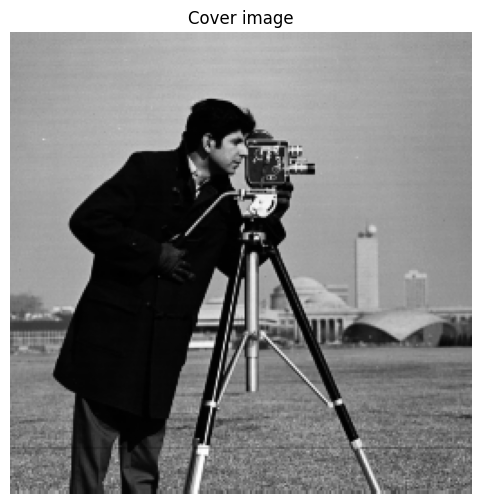

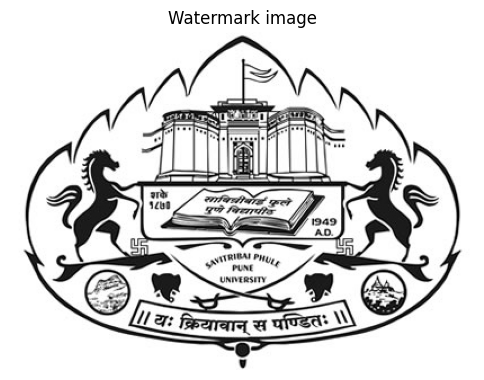

In [10]:
show_image(cover, "Cover image")
show_image(watermark, "Watermark image")

In [11]:
cover_d=np.double(cover)
watermark_d=np.double(watermark)

In [12]:
coeffs_cover = pywt.wavedec2(
    cover_d,
  	WAVELET,
  	level=DWT_LEVEL
)

In [13]:
LL3_cover = coeffs_cover[0]
(LH3, HL3, HH) = coeffs_cover[1]

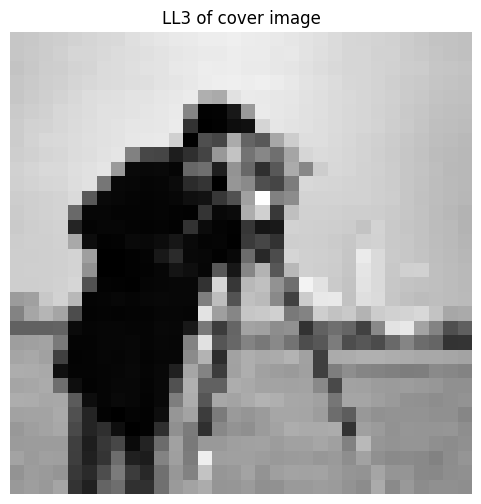

In [14]:
show_image(LL3_cover, "LL3 of cover image")

In [16]:
wm_resized = cv2.resize(watermark_d, (LL3_cover.shape[1], LL3_cover.shape[0]))

In [17]:
print(f"K (imperceptibility) = {K}")
print(f"Q (robustness)       = {Q}")

K (imperceptibility) = 0.98
Q (robustness)       = 0.02


In [18]:
LL3_embedded = (K * LL3_cover) + (Q * wm_resized)

In [20]:
print("Cover LL3 shape :", LL3_cover.shape)
print("Watermark LL3 shape :", wm_resized.shape)


Cover LL3 shape : (32, 32)
Watermark LL3 shape : (32, 32)


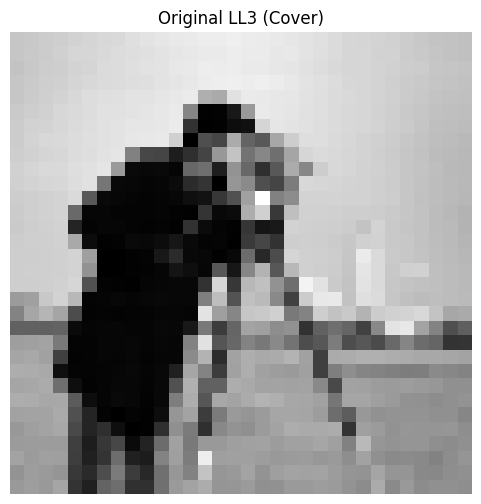

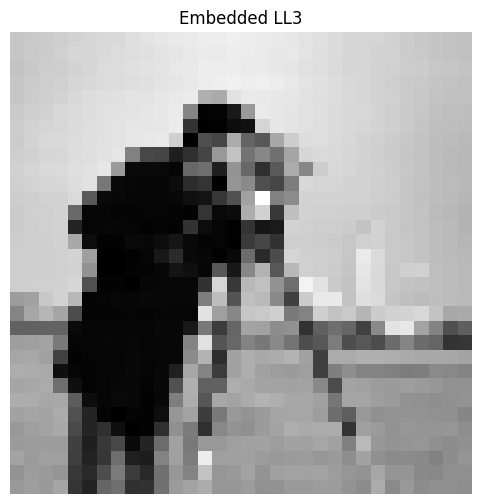

In [21]:
show_image(LL3_cover, "Original LL3 (Cover)")
show_image(LL3_embedded, "Embedded LL3")


In [22]:
coeffs_cover_embedded = list(coeffs_cover)
coeffs_cover_embedded[0] = LL3_embedded


In [24]:
watermarked_d = pywt.waverec2(
    coeffs_cover_embedded,
    WAVELET
)


In [25]:
watermarked = np.clip(watermarked_d, 0, PIXEL_MAX).astype(np.uint8)


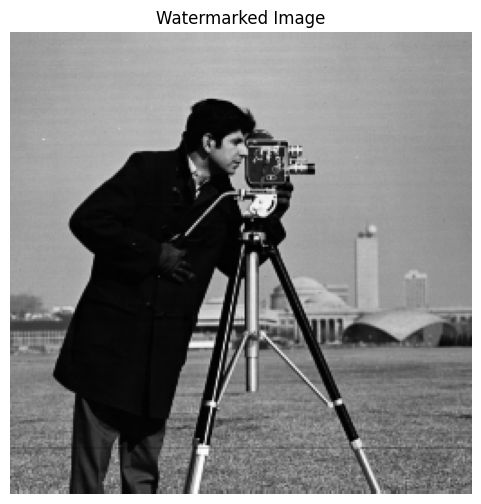

In [26]:
show_image(watermarked, "Watermarked Image")


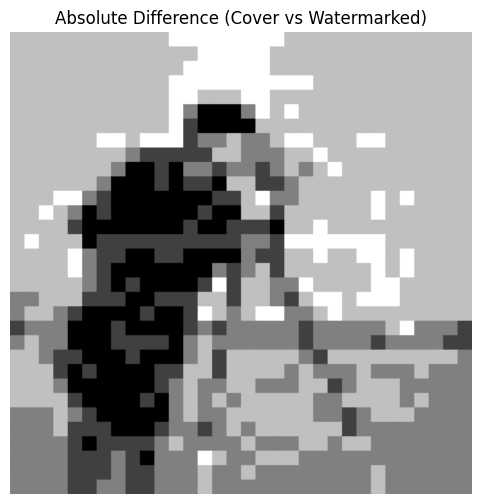

In [27]:
diff = cv2.absdiff(cover, watermarked)
show_image(diff, "Absolute Difference (Cover vs Watermarked)")


In [28]:
cv2.imwrite("watermarked.png", watermarked)


True

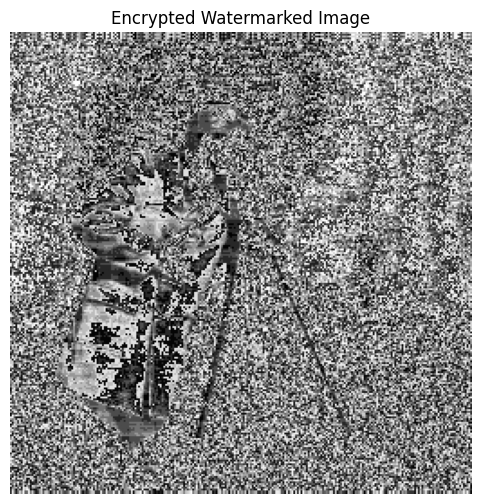

In [29]:
watermarked_int = watermarked.astype(np.int32)
encrypted_int = (watermarked_int * KEY) % MODULUS
encrypted = encrypted_int.astype(np.uint8)
show_image(encrypted, "Encrypted Watermarked Image")
mb

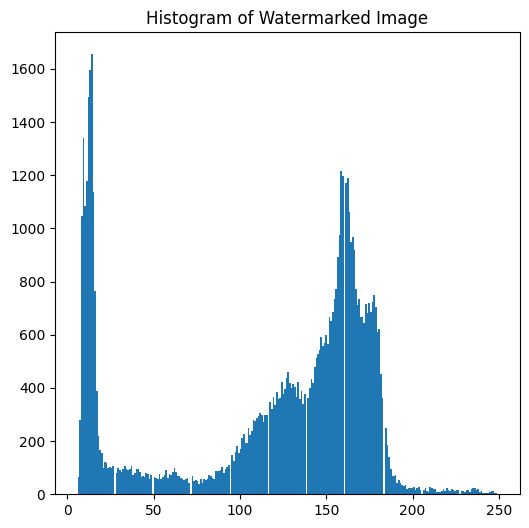

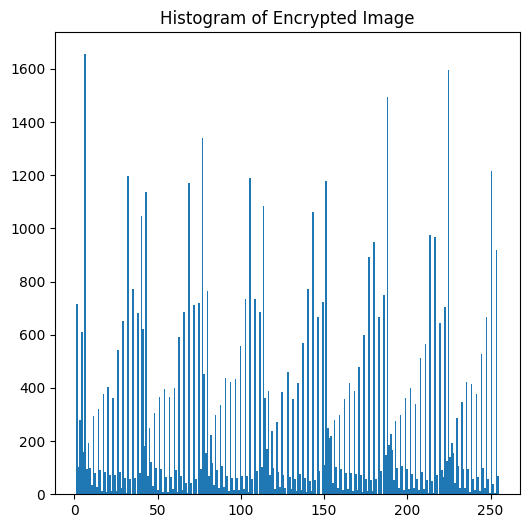

True

In [30]:
plt.figure()
plt.hist(watermarked.flatten(), bins=256)
plt.title("Histogram of Watermarked Image")
plt.show()

plt.figure()
plt.hist(encrypted.flatten(), bins=256)
plt.title("Histogram of Encrypted Image")
plt.show()
cv2.imwrite("encrypted.png", encrypted)


Modular inverse of KEY: 173


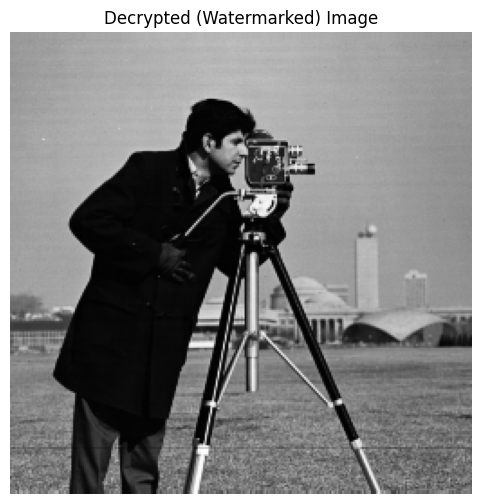

In [31]:
KEY_INV = pow(KEY, -1, MODULUS)
print("Modular inverse of KEY:", KEY_INV)
encrypted_int = encrypted.astype(np.int32)
decrypted_int = (encrypted_int * KEY_INV) % MODULUS
decrypted = decrypted_int.astype(np.uint8)
show_image(decrypted, "Decrypted (Watermarked) Image")


In [32]:
difference = cv2.absdiff(watermarked, decrypted)
print("Max pixel difference:", difference.max())
cv2.imwrite("decrypted.png", decrypted)


Max pixel difference: 0


True

In [33]:
decrypted_d = np.double(decrypted)

coeffs_dec = pywt.wavedec2(
    decrypted_d,
    WAVELET,
    level=DWT_LEVEL
)

LL3_dec = coeffs_dec[0]


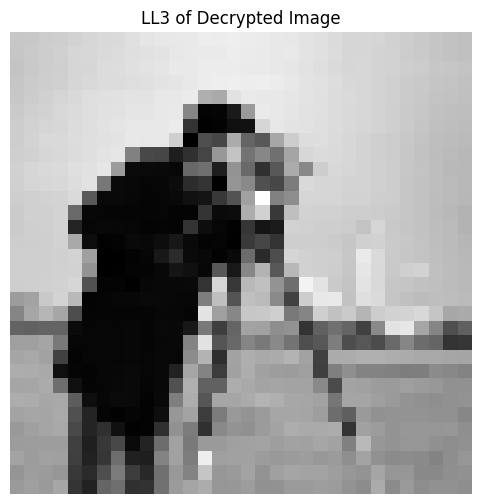

In [34]:
show_image(LL3_dec, "LL3 of Decrypted Image")


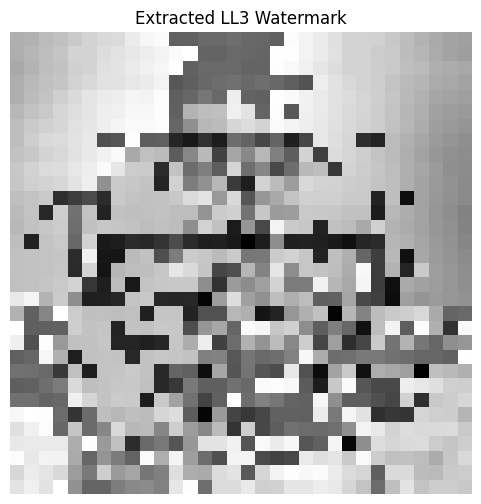

In [36]:
wm_extracted = (LL3_dec - (K * LL3_cover)) / Q
show_image(
    wm_extracted,
    "Extracted LL3 Watermark"
)


In [37]:
!git status

fatal: not a git repository (or any of the parent directories): .git
